# Dictionary Iteration

In [231]:
x = {"a": 10, "b": 20, "c": 30}

In [232]:
for i in x:
    print(i)

a
b
c


In [233]:
for i in x.values():
    print(i)

10
20
30


In [234]:
for i in x.items():
    print(i)

('a', 10)
('b', 20)
('c', 30)


In [235]:
for i, j in x.items():
    print(i, j)

a 10
b 20
c 30


# OOP

In [236]:
class Rectangle(object):
    
    def __init__(self, h, v):
        self.h = h
        self.v = v
        
    def area(self):
        return self.h * self.v

In [237]:
class Character(object):
    
    def __init__(self):
        self.life = 1000
    
    def attacked(self):
        self.life -= 10
        print(u"공격받음! 생명력 =", self.life)    

In [238]:
class Warrior(Character):
    
    def __init__(self):
        super(Warrior, self).__init__()
        self.strength = 15
        self.intelligence = 5

In [239]:
class Wizard(Character):
    
    def __init__(self):
        super(Wizard, self).__init__()
        self.strength = 5
        self.intelligence = 15

# Method Overriding

In [240]:
class Character(object):
    
    def __init__(self):
        self.life = 1000
        self.strength = 10
        self.intelligence = 10
        
    def attacked(self):
        self.life -= 10
        print(u"공격받음! 생명력 =", self.life) 
        
    def attack(self):
        print(u"공격!")             

In [241]:
class Warrior(Character):
    
    def __init__(self):
        super(Warrior, self).__init__()
        self.strength = 15
        self.intelligence = 5
        
    def attack(self):
        print(u"육탄 공격!") 

In [242]:
class Wizard(Character):
    
    def __init__(self):
        super(Wizard, self).__init__()
        self.strength = 5
        self.intelligence = 15
        
    def attack(self):
        print(u"마법 공격!") 

## cf: Overloading

이와 비슷한 이름으로 오버로딩(Overloading)이라는 것이 있는데 이는 전혀 다른 개념이다. 오버로딩은 같은 메서드가 인수의 자료형이나 갯수를 다르게 받을 수 있는 것을 말한다. C++, Java 등에서는 지원하지만 파이썬에서는 오버로딩을 지원하지 않으므로 프로그래머가 내부적으로 알아서 처리해야 한다

다음은 C++에서 오버로딩을 지원하는 함수 선언의 예이다.

```
float length(list p1, list p2);                  // 점 (p1[0], p1[1]) - (p1[0], p1[1]) 까지의 길이
float length(int x1, int y1, int x2, int y2);    // 점 (x1, y1) - (x2, y2) 까지의 길이
```

## Special Method

파이썬에는 특수 메서드(Special Methods)라는 것이 존재한다. 메서드 이름의 앞과 뒤에 두 개의 밑줄(underscore)이 붙어있는 메서드이다. 이 메서드들은 특수한 용도에 사용하는 것이다

예를 들어 파이선 셸에서 변수 이름을 치고 엔터 키(주피터 노트북의 경우에는 시프트 + 엔트)를 치면 변수의 값이 호출되는데 사실 이것은 해당 변수가 가지는 __repr__이라는 메서드가 호출되는 것이다. repr은 representation의 약자이다. 또 변수를 str이라는 함수에 넣으면 변수를 문자열로 변환해 주는데 이것도 사실은 __str__이라는 메서드가 호출되는 것이다.

예를 들어 다음과 같이 복소수에 대한 클래스인 Complex 클래스를 만든다. r이라는 속성에 실수부를, i이라는 속성에 실수부를 넣는다.

In [243]:
class Complex(object):
    
    def __init__(self, realpart, imagpart):
        self.r = realpart
        self.i = imagpart

In [244]:
class Complex2(Complex):
    
    def __repr__(self):
        return "Complex: real = %f imag = %f" % (self.r, self.i)
    
    def __str__(self):
        return "[for str] " + self.__repr__()

In [245]:
c2 = Complex2(1, 1)
c2

Complex: real = 1.000000 imag = 1.000000

In [246]:
str(c2)

'[for str] Complex: real = 1.000000 imag = 1.000000'

In [247]:
class Complex3(Complex2):
    
    def __getitem__(self, key):
        if key == "r":
            return self.r
        if key == "i":
            return self.i        

In [248]:
c3 = Complex3(1, 2)
c3

Complex: real = 1.000000 imag = 2.000000

In [249]:
c3["i"]

2

**파이썬에서 자료형과 클래스는 같은 의미이다. 클래스를 알기 위해서는 __class__ 속성을 살펴보면 된다.**

In [250]:
a = 1
type(a)

int

In [251]:
a.__class__

int

# 파이썬에서 날짜와 시간 다루기

## `datetime` 패키지

datatime 패키지에서는 날짜와 시간을 함께 저장하는 datetime 클래스, 날짜만 저장하는 date 클래스, 시간만 저장하는 time 클래스, 시간 구간 정보를 저장하는 timedelta 클래스 등을 제공한다.

## datetime.datetime 클래스

우선 datetime.datetime 클래스부터 알아보자. 패키지 이름과 클래스 이름이 datetime으로 같기 때문에 사용할 때 주의해야 한다. 또한 다른 클래스와 달리 클래스 이름이 대문자로 시작하지 않는다.

datetime.datetime 클래스에는 객체를 생성하지 않고도 바로 클래스에서 사용할 수 있는 클래스 메서드라는 것을 제공한다. 가장 대표적인 것이 현재 시각을 출력하는 now() 메서드이다.

now() 메서드는 현재의 컴퓨터 시각을 datetime.datetime 클래스 객체로 만들어 반환한다. datetime.datetime 클래스 객체는 다음과 같은 속성을 가진다.
```
year: 년
month: 월
day: 일
hour: 시
minute: 분
second: 초
microsecond: 마이크로초(micro seconds, 백만분의 일초)
```

다음과 같은 메서드도 제공한다.
```
weekday(): 요일 반환 (0:월, 1:화, 2:수, 3:목, 4:금, 5:토, 6:일)
strftime(): 문자열 반환
date(): 날짜 정보만 가지는 datetime.date 클래스 객체 반환
time(): 시간 정보만 가지는 datetime.time 클래스 객체 반환
```

In [252]:
import datetime
dt = datetime.datetime.now()
dt

datetime.datetime(2017, 5, 28, 18, 51, 4, 104165)

In [253]:
dt.strftime("%A %d. %B %Y")

'Sunday 28. May 2017'

In [254]:
datetime.datetime.strptime("2017-01-02 14:44", "%Y-%m-%d %H:%M")

datetime.datetime(2017, 1, 2, 14, 44)

## ``dateutil`` 패키지

datetime.datetime.strptime() 클래스 메서드를 사용하는 경우에는 문자열에 맞는 형식 문자열을 사용자가 제공해야 한다. 그러나 dateutil 패키지의 parse 명령을 쓰면 자동으로 형식 문자열을 찾아 datetime.datetime 클래스 객체를 만들어 준다.

In [255]:
from dateutil.parser import parse
parse('2016-04-16')

datetime.datetime(2016, 4, 16, 0, 0)

In [256]:
parse('6/7/2016')

datetime.datetime(2016, 6, 7, 0, 0)

## ``timedelta`` 클래스와 날짜/시간 연산

날짜나 시간의 간격을 구할 때는 두 개의 datetime.datetime 클래스 객체의 차이를 구한다. 이 결과는 datetime.timedelta 클래스 객체로 반환된다.

In [257]:
dt1 = datetime.datetime(2016, 2, 19, 14)
dt2 = datetime.datetime(2016, 1, 2, 13)
td = dt1 - dt2
td

datetime.timedelta(48, 3600)

datetime.timedelta 클래스는 다음과 같은 속성과 메서드를 가진다.

* 속성
    * days: 일수
    * seconds: 초. (0 ~ 86399)
    * microseconds: 마이크로초 (0 and 999999)
* 메소드
    * total_seconds(): 모든 속성을 초단위로 모아서 변환

In [258]:
td.days, td.seconds, td.microseconds

(48, 3600, 0)

In [259]:
td.total_seconds()

4150800.0

In [260]:
t0 = datetime.datetime(2017, 1, 1, 13)
d = datetime.timedelta(days=30, seconds=3600)

In [261]:
t0 + d

datetime.datetime(2017, 1, 31, 14, 0)

In [262]:
import numpy as np

In [263]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## 배열 연결

In [264]:
arr1 = np.array([[1,2,3],[4,5,6]])
arr2 = np.array([[7,8,9],[10,11,12]])

In [265]:
np.concatenate([arr1, arr2], axis=0)

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [266]:
np.concatenate([arr1, arr2], axis=1)

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

In [267]:
np.vstack([arr1, arr2])

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [268]:
np.hstack([arr1, arr2])

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

In [269]:
np.stack([arr1, arr2])

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [270]:
np.stack([arr1, arr2], axis=0)

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [271]:
np.stack([arr1,arr2], axis=1)

array([[[ 1,  2,  3],
        [ 7,  8,  9]],

       [[ 4,  5,  6],
        [10, 11, 12]]])

In [272]:
np.dstack([arr1,arr2])

array([[[ 1,  7],
        [ 2,  8],
        [ 3,  9]],

       [[ 4, 10],
        [ 5, 11],
        [ 6, 12]]])

In [273]:
arr1.shape

(2, 3)

In [274]:
arr1.ndim

2

In [275]:
np.dstack([arr1,arr2]).ndim

3

r_ 메서드는 hstack 명령과 비슷하게 배열을 좌우로 연결한다. 다만 메서드임에도 불구하고 소괄호(parenthesis, ())를 사용하지 않고 인덱싱과 같이 대괄호(bracket, [])를 사용한다. 이런 특수 메서드를 인덱서(indexer)라고 한다. c_ 메서드는 배열의 차원을 증가시킨 후 좌우로 연결한다. 만약 1차원 배열을 연결하면 2차원 배열이 된다.

In [276]:
np.r_[arr1, arr2]

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [277]:
np.c_[arr1, arr2]

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

tile 명령은 동일한 배열을 반복하여 연결한다.

In [278]:
a = np.array([0, 1, 2])
np.tile(a, 2)

array([0, 1, 2, 0, 1, 2])

In [279]:
np.tile(a, (3, 2))

array([[0, 1, 2, 0, 1, 2],
       [0, 1, 2, 0, 1, 2],
       [0, 1, 2, 0, 1, 2]])

## 그리드 생성

In [280]:
x = np.arange(3)
x

array([0, 1, 2])

In [281]:
y = np.arange(5)
y

array([0, 1, 2, 3, 4])

In [282]:
X, Y = np.meshgrid(x, y)

In [283]:
X

array([[0, 1, 2],
       [0, 1, 2],
       [0, 1, 2],
       [0, 1, 2],
       [0, 1, 2]])

In [284]:
Y

array([[0, 0, 0],
       [1, 1, 1],
       [2, 2, 2],
       [3, 3, 3],
       [4, 4, 4]])

In [285]:
import matplotlib.pyplot as plt
%matplotlib inline

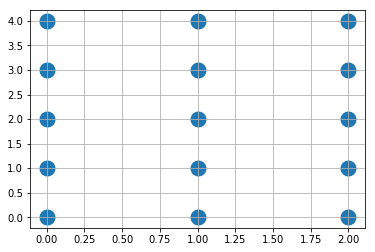

In [286]:
plt.scatter(X, Y, linewidths=10)
plt.grid()
plt.show()

In [287]:
t = np.array([[1,2,3],[4,5,6],[7,8,9]])
t

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [288]:
t.mean(axis=0)

array([ 4.,  5.,  6.])

In [289]:
t.mean(axis=1)

array([ 2.,  5.,  8.])

In [290]:
t.mean()

5.0

In [291]:
s = np.random.randint(10,size=(4,3))
s

array([[3, 3, 7],
       [0, 1, 9],
       [9, 0, 4],
       [7, 3, 2]])

sort 명령이나 메서드를 사용하여 배열 안의 원소를 크기에 따라 정렬하여 새로운 배열을 만들 수도 있다. 2차원 이상인 경우에는 마찬가지로 axis 인수를 사용하여 방향을 결정한다. 즉 axis로 지정한 축 방향을 무시하여 정렬하라는 뜻이다. 디폴트 값은 -1 즉 가장 안쪽의 차원이다. **sort 메서드는 해당 객체의 자료 자체가 변화하는 in-place 메서드이므로 사용할 때 주의를 기울여야 한다.**

In [292]:
s.sort()
s

array([[3, 3, 7],
       [0, 1, 9],
       [0, 4, 9],
       [2, 3, 7]])

In [293]:
s.sort(axis=0)
s

array([[0, 1, 7],
       [0, 3, 7],
       [2, 3, 9],
       [3, 4, 9]])

In [294]:
s

array([[0, 1, 7],
       [0, 3, 7],
       [2, 3, 9],
       [3, 4, 9]])

만약 자료를 정렬하는 것이 아니라 순서만 알고 싶다면 argsort 명령을 사용한다.

In [295]:
s = np.random.randint(10,size=(4,3))
s

array([[7, 2, 0],
       [0, 4, 5],
       [5, 6, 8],
       [4, 1, 4]])

In [296]:
s.argsort(axis=0)

array([[1, 3, 0],
       [3, 0, 3],
       [2, 1, 1],
       [0, 2, 2]], dtype=int64)

In [297]:
s.argsort(axis=1)

array([[2, 1, 0],
       [0, 1, 2],
       [0, 1, 2],
       [1, 0, 2]], dtype=int64)

# Pandas

Pandas 패키지는 데이터 분석을 할 때 가장 많이 쓰이는 패키지 중의 하나이다. 대부분의 데이터는 시계열(series)이나 표(table)의 형태로 나타낼 수 있는데 Pandas 패키지에서는 이러한 표 데이터를 다루기 위한 시리즈(Series) 클래스와 데이터프레임(DataFrame) 클래스를 제공한다.

In [298]:
import pandas as pd
s = pd.Series([9904312, 3448737, 2890451, 2466052], index=["서울", "부산", "인천", "대구"])
s

서울    9904312
부산    3448737
인천    2890451
대구    2466052
dtype: int64

In [299]:
pd.Series(range(10, 14))

0    10
1    11
2    12
3    13
dtype: int32

In [300]:
s.index

Index(['서울', '부산', '인천', '대구'], dtype='object')

In [301]:
s.values

array([9904312, 3448737, 2890451, 2466052], dtype=int64)

In [302]:
s.value_counts()

2466052    1
2890451    1
3448737    1
9904312    1
dtype: int64

In [303]:
s.name = "인구"
s.index.name = "도시"
s

도시
서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

In [304]:
s

도시
서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

In [305]:
s / 1000000

도시
서울    9.904312
부산    3.448737
인천    2.890451
대구    2.466052
Name: 인구, dtype: float64

In [306]:
s[1], s["부산"]

(3448737, 3448737)

In [307]:
s[3], s["대구"]

(2466052, 2466052)

In [308]:
s[[0, 3, 1]]

도시
서울    9904312
대구    2466052
부산    3448737
Name: 인구, dtype: int64

In [309]:
s[["서울", "대구", "부산"]]

도시
서울    9904312
대구    2466052
부산    3448737
Name: 인구, dtype: int64

In [310]:
s[(250e4 < s) & (s < 500e4)]

도시
부산    3448737
인천    2890451
Name: 인구, dtype: int64

In [311]:
s[1:3]

도시
부산    3448737
인천    2890451
Name: 인구, dtype: int64

In [312]:
s["부산":"대구"]

도시
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

In [313]:
s0 = pd.Series(range(3), index=["a", "b", "c"])
s0

a    0
b    1
c    2
dtype: int32

In [314]:
s0.a

0

In [315]:
s0.b

1

In [316]:
"서울" in s

True

In [317]:
"대전" in s

False

In [318]:
for k, v in s.iteritems():
    print("%s = %d" % (k, v))

서울 = 9904312
부산 = 3448737
인천 = 2890451
대구 = 2466052


In [319]:
s2 = pd.Series({"서울": 9631482, "부산": 3393191, "인천": 2632035, "대전": 1490158})
s2

대전    1490158
부산    3393191
서울    9631482
인천    2632035
dtype: int64

In [320]:
s2 = pd.Series({"서울": 9631482, "부산": 3393191, "인천": 2632035, "대전": 1490158}, 
               index=["부산", "서울", "인천", "대전"])
s2

부산    3393191
서울    9631482
인천    2632035
대전    1490158
dtype: int64

In [321]:
s

도시
서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

In [322]:
ds = s - s2
ds

대구         NaN
대전         NaN
부산     55546.0
서울    272830.0
인천    258416.0
dtype: float64

In [323]:
ds.notnull()

대구    False
대전    False
부산     True
서울     True
인천     True
dtype: bool

In [324]:
ds.isnull()

대구     True
대전     True
부산    False
서울    False
인천    False
dtype: bool

In [325]:
ds

대구         NaN
대전         NaN
부산     55546.0
서울    272830.0
인천    258416.0
dtype: float64

In [326]:
ds[ds.notnull()]

부산     55546.0
서울    272830.0
인천    258416.0
dtype: float64

In [327]:
ds[ds.isnull()]

대구   NaN
대전   NaN
dtype: float64

In [328]:
rs = (s - s2) / s2 * 100
rs = rs[rs.notnull()]
rs

부산    1.636984
서울    2.832690
인천    9.818107
dtype: float64

In [329]:
rs["부산"] = 1.63
rs

부산    1.630000
서울    2.832690
인천    9.818107
dtype: float64

In [330]:
rs["대구"] = 1.41
rs

부산    1.630000
서울    2.832690
인천    9.818107
대구    1.410000
dtype: float64

In [331]:
del rs["서울"]
rs

부산    1.630000
인천    9.818107
대구    1.410000
dtype: float64

## DataFrame
데이터프레임을 만드는 방법은 다양하다. 가장 간단한 방법은 다음과 같이 리스트나 일차원 배열을 값(value)으로 가지고 열방향 인덱스 라벨을 키(key)로 가지는 사전(dictionary) 데이터를 DataFrame 클래스 생성자에 넣는다. 이 때 열방향 인덱스는 columns 인수에, 행방향 인덱스는 index 인수에 지정한다.

In [332]:
data = {
    "2015": [9904312, 3448737, 2890451, 2466052],
    "2010": [9631482, 3393191, 2632035, 2431774],
    "2005": [9762546, 3512547, 2517680, 2456016],
    "2000": [9853972, 3655437, 2466338, 2473990],
    "지역": ["수도권", "경상권", "수도권", "경상권"],
    "2010-2015 증가율": [0.0283, 0.0163, 0.0982, 0.0141]
}
columns = ["지역", "2015", "2010", "2005", "2000", "2010-2015 증가율"]
index = ["서울", "부산", "인천", "대구"]
df = pd.DataFrame(data, index=index, columns=columns)
df

,지역,2015,2010,2005,2000,2010-2015 증가율
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2431774,2456016,2473990,0.0141


In [333]:
df.values

array([['수도권', 9904312, 9631482, 9762546, 9853972, 0.0283],
       ['경상권', 3448737, 3393191, 3512547, 3655437, 0.0163],
       ['수도권', 2890451, 2632035, 2517680, 2466338, 0.0982],
       ['경상권', 2466052, 2431774, 2456016, 2473990, 0.0141]], dtype=object)

In [334]:
df.columns

Index(['지역', '2015', '2010', '2005', '2000', '2010-2015 증가율'], dtype='object')

In [335]:
df.index

Index(['서울', '부산', '인천', '대구'], dtype='object')

In [336]:
df.index.name = "도시"
df.columns.name = "특성"
df

특성,지역,2015,2010,2005,2000,2010-2015 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2431774,2456016,2473990,0.0141


In [337]:
df["지역"]

도시
서울    수도권
부산    경상권
인천    수도권
대구    경상권
Name: 지역, dtype: object

In [338]:
df[["2010", "2015"]]

특성,2010,2015
도시,,
서울,9631482,9904312
부산,3393191,3448737
인천,2632035,2890451
대구,2431774,2466052


In [339]:
df[["2010"]]

특성,2010
도시,
서울,9631482
부산,3393191
인천,2632035
대구,2431774


In [340]:
type(df[["2010"]])

pandas.core.frame.DataFrame

In [341]:
df2 = pd.DataFrame(np.arange(12).reshape(3, 4))
df2

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [342]:
df2[2]

0     2
1     6
2    10
Name: 2, dtype: int32

In [343]:
df["2010-2015 증가율"] = df["2010-2015 증가율"] * 100
df

특성,지역,2015,2010,2005,2000,2010-2015 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,2.83
부산,경상권,3448737,3393191,3512547,3655437,1.63
인천,수도권,2890451,2632035,2517680,2466338,9.82
대구,경상권,2466052,2431774,2456016,2473990,1.41


In [344]:
df["2005-2010 증가율"] = ((df["2010"] - df["2005"]) / df["2005"] * 100).round(2)
df

특성,지역,2015,2010,2005,2000,2010-2015 증가율,2005-2010 증가율
도시,,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,2.83,-1.34
부산,경상권,3448737,3393191,3512547,3655437,1.63,-3.40
인천,수도권,2890451,2632035,2517680,2466338,9.82,4.54
대구,경상권,2466052,2431774,2456016,2473990,1.41,-0.99


In [345]:
del df["2010-2015 증가율"]
df

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,-1.34
부산,경상권,3448737,3393191,3512547,3655437,-3.40
인천,수도권,2890451,2632035,2517680,2466338,4.54
대구,경상권,2466052,2431774,2456016,2473990,-0.99


In [346]:
df["2015"]["서울"]

9904312

In [347]:
df[:2]

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,-1.34
부산,경상권,3448737,3393191,3512547,3655437,-3.40


In [348]:
df[1:2]

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
부산,경상권,3448737,3393191,3512547,3655437,-3.4


In [349]:
df[1:3]

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
부산,경상권,3448737,3393191,3512547,3655437,-3.40
인천,수도권,2890451,2632035,2517680,2466338,4.54


In [350]:
df["서울":"부산"]

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,-1.34
부산,경상권,3448737,3393191,3512547,3655437,-3.40


# Indexer

In [351]:
df

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,-1.34
부산,경상권,3448737,3393191,3512547,3655437,-3.40
인천,수도권,2890451,2632035,2517680,2466338,4.54
대구,경상권,2466052,2431774,2456016,2473990,-0.99


In [352]:
df.loc["인천"]

특성
지역                   수도권
2015             2890451
2010             2632035
2005             2517680
2000             2466338
2005-2010 증가율       4.54
Name: 인천, dtype: object

In [353]:
df.loc[:,"2010"]

도시
서울    9631482
부산    3393191
인천    2632035
대구    2431774
Name: 2010, dtype: int64

In [354]:
df.loc[:,"2010":"2000"]

특성,2010,2005,2000
도시,,,
서울,9631482,9762546,9853972
부산,3393191,3512547,3655437
인천,2632035,2517680,2466338
대구,2431774,2456016,2473990


In [355]:
df.loc[["서울","대구"],["2010","2005"]]

특성,2010,2005
도시,,
서울,9631482,9762546
대구,2431774,2456016


In [356]:
df.loc["서울":"인천"]

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,-1.34
부산,경상권,3448737,3393191,3512547,3655437,-3.40
인천,수도권,2890451,2632035,2517680,2466338,4.54


In [357]:
df.지역

도시
서울    수도권
부산    경상권
인천    수도권
대구    경상권
Name: 지역, dtype: object

In [358]:
df.loc["제주"] = ["제주권",1,1,1,1,0]

In [359]:
df

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,-1.34
부산,경상권,3448737,3393191,3512547,3655437,-3.40
인천,수도권,2890451,2632035,2517680,2466338,4.54
대구,경상권,2466052,2431774,2456016,2473990,-0.99
제주,제주권,1,1,1,1,0.00


In [360]:
df.iloc[0]

특성
지역                   수도권
2015             9904312
2010             9631482
2005             9762546
2000             9853972
2005-2010 증가율      -1.34
Name: 서울, dtype: object

In [361]:
df.iloc[2:4]

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
인천,수도권,2890451,2632035,2517680,2466338,4.54
대구,경상권,2466052,2431774,2456016,2473990,-0.99


In [362]:
df.iloc[1,1]

3448737

In [363]:
df.iloc[-1,-1]

0.0

## 데이터처리

In [364]:
s = pd.Series(range(10))
s[3] = np.nan
s

0    0.0
1    1.0
2    2.0
3    NaN
4    4.0
5    5.0
6    6.0
7    7.0
8    8.0
9    9.0
dtype: float64

In [365]:
s.count()

9

In [366]:
np.random.seed(1)
df = pd.DataFrame(np.random.randint(5, size=(4, 4)))
df.iloc[2,3] = np.nan
df

,0,1,2,3
0,3,4,0,1.0
1,3,0,0,1.0
2,4,4,1,NaN
3,4,2,4,3.0


In [367]:
df.count()

0    4
1    4
2    4
3    3
dtype: int64

In [368]:
df.count(axis=1)

0    4
1    4
2    3
3    4
dtype: int64

시리즈의 값이 정수, 문자열, 카테고리 값인 경우에는 ``value_counts`` 메서드로 각각의 값이 나온 횟수를 셀 수 있다.

In [369]:
np.random.seed(1)
s = pd.Series(np.random.randint(6, size=100))
s.tail()

95    4
96    5
97    2
98    4
99    3
dtype: int32

In [370]:
s.value_counts().sort_index()

0    18
1    22
2    13
3    14
4    17
5    16
dtype: int64

In [371]:
s.value_counts().sort_values()

2    13
3    14
5    16
4    17
0    18
1    22
dtype: int64

In [372]:
df.sum(axis=1)

0     8.0
1     4.0
2     9.0
3    13.0
dtype: float64

In [373]:
df["Sum"] = df.sum(axis=1)
df

,0,1,2,3,Sum
0,3,4,0,1.0,8.0
1,3,0,0,1.0,4.0
2,4,4,1,NaN,9.0
3,4,2,4,3.0,13.0


In [374]:
df.loc["Total", :] = df.sum()
df

,0,1,2,3,Sum
0,3.0,4.0,0.0,1.0,8.0
1,3.0,0.0,0.0,1.0,4.0
2,4.0,4.0,1.0,NaN,9.0
3,4.0,2.0,4.0,3.0,13.0
Total,14.0,10.0,5.0,5.0,34.0


In [375]:
df = pd.DataFrame({
        'A': [1, 3, 4, 3, 4],
        'B': [2, 3, 1, 2, 3],
        'C': [1, 5, 2, 4, 4]
    })
df

,A,B,C
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [376]:
df.apply(lambda x: x.max() - x.min())

A    3
B    2
C    4
dtype: int64

In [377]:
df.apply(lambda x: x.max() - x.min(), axis=1)

0    1
1    2
2    3
3    2
4    1
dtype: int64

In [378]:
df.apply(pd.value_counts)

,A,B,C
1,1.0,1.0,1.0
2,NaN,2.0,1.0
3,2.0,2.0,NaN
4,2.0,NaN,2.0
5,NaN,NaN,1.0


In [379]:
df.apply(pd.value_counts).fillna(0)

,A,B,C
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


In [380]:
ages = [0, 2, 10, 21, 23, 37, 31, 61, 20, 41, 32]

In [381]:
bins = [1, 15, 25, 35, 60, 190]
labels = ["미성년자", "청년", "중년", "장년", "노년"]
cats = pd.cut(ages, bins, labels=labels)
cats

[NaN, 미성년자, 미성년자, 청년, 청년, ..., 중년, 노년, 청년, 장년, 중년]
Length: 11
Categories (5, object): [노년 < 미성년자 < 장년 < 중년 < 청년]

In [382]:
type(cats)

pandas.core.categorical.Categorical

In [383]:
cats.categories

Index(['노년', '미성년자', '장년', '중년', '청년'], dtype='object')

In [384]:
cats.codes

array([-1,  1,  1,  4,  4,  2,  3,  0,  4,  2,  3], dtype=int8)

In [385]:
df = pd.DataFrame(ages, columns=["ages"])
df["age_cat"] = pd.cut(df.ages, bins, labels=labels)
df

,ages,age_cat
0,0,NaN
1,2,미성년자
2,10,미성년자
3,21,청년
4,23,청년
5,37,장년
6,31,중년
7,61,노년
8,20,청년
9,41,장년


qcut 명령은 같은 데이터를 가진 구간으로 나눈다. 예를 들어 다음 코드는 1000개의 데이터를 4개의 구간으로 나누는데 각 구간은 250개씩의 데이터를 가진다.

In [386]:
data = np.random.randn(1000)
cats = pd.qcut(data, 4, labels=["Q1", "Q2", "Q3", "Q4"])
cats

[Q4, Q3, Q2, Q4, Q4, ..., Q4, Q4, Q3, Q3, Q1]
Length: 1000
Categories (4, object): [Q1 < Q2 < Q3 < Q4]

In [387]:
pd.value_counts(cats)

Q4    250
Q3    250
Q2    250
Q1    250
dtype: int64

# Pandas 인덱스 조작

## 데이터프레임 인덱스 설정 및 제거

때로는 데이터프레임에 인덱스로 들어가 있어야 할 데이터가 일반 데이터 열에 들어가 있거나 반대로 일반 데이터 열이어야 할 것이 인덱스로 되어 있을 수 있다. 이 때는 set_index 명령이나 reset_index 명령으로 인덱스와 일반 데이터 열을 교환할 수 있다.

* set_index : 기존의 행 인덱스를 제거하고 데이터 열 중 하나를 인덱스로 설정
* reset_index : 기존의 행 인덱스를 제거하고 인덱스를 마지막 데이터 열로 추가

In [388]:
np.random.seed(0)
df = pd.DataFrame(np.random.randint(1, 10, (10, 4)), 
                  columns=["C1", "C2", "C3", "C4"])
df

,C1,C2,C3,C4
0,6,1,4,4
1,8,4,6,3
2,5,8,7,9
3,9,2,7,8
4,8,9,2,6
5,9,5,4,1
6,4,6,1,3
7,4,9,2,4
8,4,4,8,1
9,2,1,5,8


In [389]:
df1 = df.set_index("C1")
df1

,C2,C3,C4
C1,,,
6,1,4,4
8,4,6,3
5,8,7,9
9,2,7,8
8,9,2,6
9,5,4,1
4,6,1,3
4,9,2,4
4,4,8,1


In [390]:
df2 = df1.set_index("C2")
df2

,C3,C4
C2,,
1,4,4
4,6,3
8,7,9
2,7,8
9,2,6
5,4,1
6,1,3
9,2,4
4,8,1


In [391]:
df1.reset_index()

,C1,C2,C3,C4
0,6,1,4,4
1,8,4,6,3
2,5,8,7,9
3,9,2,7,8
4,8,9,2,6
5,9,5,4,1
6,4,6,1,3
7,4,9,2,4
8,4,4,8,1
9,2,1,5,8


In [392]:
df1.reset_index(drop=True)

,C2,C3,C4
0,1,4,4
1,4,6,3
2,8,7,9
3,2,7,8
4,9,2,6
5,5,4,1
6,6,1,3
7,9,2,4
8,4,8,1
9,1,5,8


# 다중 인덱스

In [393]:
np.random.seed(0)
df3 = pd.DataFrame(np.random.randint(1, 10, (10, 4)), 
                  columns=[["A", "A", "B", "B"], ["C1", "C2", "C3", "C4"]])
df3

A     B   
  C1 C2 C3 C4
0  6  1  4  4
1  8  4  6  3
2  5  8  7  9
3  9  2  7  8
4  8  9  2  6
5  9  5  4  1
6  4  6  1  3
7  4  9  2  4
8  4  4  8  1
9  2  1  5  8

다중 인덱스는 이름을 지정하면 더 편리하게 사용할 수 있다. 열 인덱스들의 이름 지정은 columns 객체의 names 속성에 리스트를 넣어서 지정한다.

In [394]:
df3.columns.names = ["Cdx1", "Cdx2"]
df3

Cdx1  A     B   
Cdx2 C1 C2 C3 C4
0     6  1  4  4
1     8  4  6  3
2     5  8  7  9
3     9  2  7  8
4     8  9  2  6
5     9  5  4  1
6     4  6  1  3
7     4  9  2  4
8     4  4  8  1
9     2  1  5  8

In [395]:
np.random.seed(0)
df4 = pd.DataFrame(np.random.randint(1, 10, (8, 4)), 
                  columns=[["A", "A", "B", "B"], ["C", "D", "C", "D"]],
                  index=[["M", "M", "M", "M", "F", "F", "F", "F"], ["ID" + str(i) for i in range(4)] * 2])
df4.columns.names = ["Cdx1", "Cdx2"]
df4.index.names = ["Rdx1", "Rdx2"]
df4

Cdx1       A     B   
Cdx2       C  D  C  D
Rdx1 Rdx2            
M    ID0   6  1  4  4
     ID1   8  4  6  3
     ID2   5  8  7  9
     ID3   9  2  7  8
F    ID0   8  9  2  6
     ID1   9  5  4  1
     ID2   4  6  1  3
     ID3   4  9  2  4

# 행 인덱스와 열 인덱스 교환

In [396]:
df4

Cdx1       A     B   
Cdx2       C  D  C  D
Rdx1 Rdx2            
M    ID0   6  1  4  4
     ID1   8  4  6  3
     ID2   5  8  7  9
     ID3   9  2  7  8
F    ID0   8  9  2  6
     ID1   9  5  4  1
     ID2   4  6  1  3
     ID3   4  9  2  4

In [397]:
df4.stack("Cdx1")

Cdx2            C  D
Rdx1 Rdx2 Cdx1      
M    ID0  A     6  1
          B     4  4
     ID1  A     8  4
          B     6  3
     ID2  A     5  8
          B     7  9
     ID3  A     9  2
          B     7  8
F    ID0  A     8  9
          B     2  6
     ID1  A     9  5
          B     4  1
     ID2  A     4  6
          B     1  3
     ID3  A     4  9
          B     2  4

In [398]:
df4.stack([0,1])

Rdx1  Rdx2  Cdx1  Cdx2
M     ID0   A     C       6
                  D       1
            B     C       4
                  D       4
      ID1   A     C       8
                  D       4
            B     C       6
                  D       3
      ID2   A     C       5
                  D       8
            B     C       7
                  D       9
      ID3   A     C       9
                  D       2
            B     C       7
                  D       8
F     ID0   A     C       8
                  D       9
            B     C       2
                  D       6
      ID1   A     C       9
                  D       5
            B     C       4
                  D       1
      ID2   A     C       4
                  D       6
            B     C       1
                  D       3
      ID3   A     C       4
                  D       9
            B     C       2
                  D       4
dtype: int32

In [399]:
df4

Cdx1       A     B   
Cdx2       C  D  C  D
Rdx1 Rdx2            
M    ID0   6  1  4  4
     ID1   8  4  6  3
     ID2   5  8  7  9
     ID3   9  2  7  8
F    ID0   8  9  2  6
     ID1   9  5  4  1
     ID2   4  6  1  3
     ID3   4  9  2  4

In [400]:
df4.unstack("Rdx2")

Cdx1   A                               B                            
Cdx2   C               D               C               D            
Rdx2 ID0 ID1 ID2 ID3 ID0 ID1 ID2 ID3 ID0 ID1 ID2 ID3 ID0 ID1 ID2 ID3
Rdx1                                                                
F      8   9   4   4   9   5   6   9   2   4   1   2   6   1   3   4
M      6   8   5   9   1   4   8   2   4   6   7   7   4   3   9   8

In [401]:
df4.unstack(["Rdx2","Rdx1"])

Cdx1  Cdx2  Rdx2  Rdx1
A     C     ID0   F       8
                  M       6
            ID1   F       9
                  M       8
            ID2   F       4
                  M       5
            ID3   F       4
                  M       9
      D     ID0   F       9
                  M       1
            ID1   F       5
                  M       4
            ID2   F       6
                  M       8
            ID3   F       9
                  M       2
B     C     ID0   F       2
                  M       4
            ID1   F       4
                  M       6
            ID2   F       1
                  M       7
            ID3   F       2
                  M       7
      D     ID0   F       6
                  M       4
            ID1   F       1
                  M       3
            ID2   F       3
                  M       9
            ID3   F       4
                  M       8
dtype: int32

In [402]:
type(df4.unstack(["Rdx2","Rdx1"]))

pandas.core.series.Series

In [403]:
df4.unstack(1)

Cdx1   A                               B                            
Cdx2   C               D               C               D            
Rdx2 ID0 ID1 ID2 ID3 ID0 ID1 ID2 ID3 ID0 ID1 ID2 ID3 ID0 ID1 ID2 ID3
Rdx1                                                                
F      8   9   4   4   9   5   6   9   2   4   1   2   6   1   3   4
M      6   8   5   9   1   4   8   2   4   6   7   7   4   3   9   8

데이터프레임이 다중 인덱스를 가지는 경우에는 인덱스가 하나의 라벨이나 숫자가 아니라 ()로 둘러싸인 튜플이 되어야 한다. 만약 하나의 레벨 값만 넣으면 다중 인덱스 중에서 가장 상위의 값을 지정한 것으로 본다.

예를 들어 앞에서 만든 df3 데이터프레임의 경우 다음과 같이 인덱싱한다.

In [404]:
df3

Cdx1  A     B   
Cdx2 C1 C2 C3 C4
0     6  1  4  4
1     8  4  6  3
2     5  8  7  9
3     9  2  7  8
4     8  9  2  6
5     9  5  4  1
6     4  6  1  3
7     4  9  2  4
8     4  4  8  1
9     2  1  5  8

In [405]:
df3["A"]

Cdx2,C1,C2
0,6,1
1,8,4
2,5,8
3,9,2
4,8,9
5,9,5
6,4,6
7,4,9
8,4,4
9,2,1


In [406]:
df3[("A", "C1")]

0    6
1    8
2    5
3    9
4    8
5    9
6    4
7    4
8    4
9    2
Name: (A, C1), dtype: int32

In [407]:
df3.loc[2, ("A", "C1")]

5

In [408]:
df4

Cdx1       A     B   
Cdx2       C  D  C  D
Rdx1 Rdx2            
M    ID0   6  1  4  4
     ID1   8  4  6  3
     ID2   5  8  7  9
     ID3   9  2  7  8
F    ID0   8  9  2  6
     ID1   9  5  4  1
     ID2   4  6  1  3
     ID3   4  9  2  4

In [409]:
df4.loc["F",("A","D")]

Rdx2
ID0    9
ID1    5
ID2    6
ID3    9
Name: (A, D), dtype: int32

In [410]:
df4.loc[("F","ID1"),:]

Cdx1  Cdx2
A     C       9
      D       5
B     C       4
      D       1
Name: (F, ID1), dtype: int32

In [411]:
df4.loc[:, ("A", "C")]

Rdx1  Rdx2
M     ID0     6
      ID1     8
      ID2     5
      ID3     9
F     ID0     8
      ID1     9
      ID2     4
      ID3     4
Name: (A, C), dtype: int32

In [412]:
df4.loc[("All","All"),:] = df4.sum()
df4

Cdx1          A           B      
Cdx2          C     D     C     D
Rdx1 Rdx2                        
M    ID0    6.0   1.0   4.0   4.0
     ID1    8.0   4.0   6.0   3.0
     ID2    5.0   8.0   7.0   9.0
     ID3    9.0   2.0   7.0   8.0
F    ID0    8.0   9.0   2.0   6.0
     ID1    9.0   5.0   4.0   1.0
     ID2    4.0   6.0   1.0   3.0
     ID3    4.0   9.0   2.0   4.0
All  All   53.0  44.0  33.0  38.0

다중 인덱스의 인덱스 순서를 바꾸고 싶으면 swaplevel 명령을 사용한다.

* swaplevel(i, j, axis)

``i``와 ``j``는 교환하고자 하는 인덱스 라벨(혹은 인덱스 번호)이고 axis는 0일 때 행 인덱스, 1일 때 열 인덱스를 뜻한다.

In [413]:
df4.swaplevel("Rdx1", "Rdx2")

Cdx1          A           B      
Cdx2          C     D     C     D
Rdx2 Rdx1                        
ID0  M      6.0   1.0   4.0   4.0
ID1  M      8.0   4.0   6.0   3.0
ID2  M      5.0   8.0   7.0   9.0
ID3  M      9.0   2.0   7.0   8.0
ID0  F      8.0   9.0   2.0   6.0
ID1  F      9.0   5.0   4.0   1.0
ID2  F      4.0   6.0   1.0   3.0
ID3  F      4.0   9.0   2.0   4.0
All  All   53.0  44.0  33.0  38.0

In [414]:
df4.swaplevel("Cdx1", "Cdx2", 1)

Cdx2          C     D     C     D
Cdx1          A     A     B     B
Rdx1 Rdx2                        
M    ID0    6.0   1.0   4.0   4.0
     ID1    8.0   4.0   6.0   3.0
     ID2    5.0   8.0   7.0   9.0
     ID3    9.0   2.0   7.0   8.0
F    ID0    8.0   9.0   2.0   6.0
     ID1    9.0   5.0   4.0   1.0
     ID2    4.0   6.0   1.0   3.0
     ID3    4.0   9.0   2.0   4.0
All  All   53.0  44.0  33.0  38.0

# 데이터 합성

In [416]:
df1 = pd.DataFrame({
    '고객번호': [1001, 1002, 1003, 1004, 1005, 1006, 1007],
    '이름': ['둘리', '도우너', '또치', '길동', '희동', '마이콜', '영희']
    }, columns=['고객번호', '이름']
)
df1

,고객번호,이름
0,1001,둘리
1,1002,도우너
2,1003,또치
3,1004,길동
4,1005,희동
5,1006,마이콜
6,1007,영희


In [417]:
df2 = pd.DataFrame({
    '고객번호': [1001, 1001, 1005, 1006, 1008, 1001],
    '금액': [10000, 20000, 15000, 5000, 100000, 30000]
    }, columns=['고객번호', '금액']
)
df2

,고객번호,금액
0,1001,10000
1,1001,20000
2,1005,15000
3,1006,5000
4,1008,100000
5,1001,30000


merge 명령으로 두 데이터프레임 df1, df2 를 합치면 공통 열인 고객번호 열을 기준으로 데이터를 찾아서 합친다. 이 때 기본적으로는 양쪽 데이터프레임에 모두 키가 존재하는 데이터만 보여주는 inner join 방식을 사용한다.

In [418]:
pd.merge(df1, df2)

,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1001,둘리,30000
3,1005,희동,15000
4,1006,마이콜,5000


In [419]:
pd.merge(df1, df2, how='outer')

,고객번호,이름,금액
0,1001,둘리,10000.0
1,1001,둘리,20000.0
2,1001,둘리,30000.0
3,1002,도우너,NaN
4,1003,또치,NaN
5,1004,길동,NaN
6,1005,희동,15000.0
7,1006,마이콜,5000.0
8,1007,영희,NaN
9,1008,NaN,100000.0


In [420]:
pd.merge(df1, df2, how='left')

,고객번호,이름,금액
0,1001,둘리,10000.0
1,1001,둘리,20000.0
2,1001,둘리,30000.0
3,1002,도우너,NaN
4,1003,또치,NaN
5,1004,길동,NaN
6,1005,희동,15000.0
7,1006,마이콜,5000.0
8,1007,영희,NaN


In [421]:
pd.merge(df1, df2, how='right')

,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1001,둘리,30000
3,1005,희동,15000
4,1006,마이콜,5000
5,1008,NaN,100000


In [422]:
df1 = pd.DataFrame({'key': ['setosa', 'setosa', 'virginica', 'versicolor'], 
                    'petal length': [1.4, 1.3, 1.5, 1.3]})
df1

,key,petal length
0,setosa,1.4
1,setosa,1.3
2,virginica,1.5
3,versicolor,1.3


In [423]:
df2 = pd.DataFrame({'key': ['setosa', 'virginica', 'virginica', 'versicolor'], 
                    'petal width': [0.4, 0.3, 0.5, 0.3]})
df2

,key,petal width
0,setosa,0.4
1,virginica,0.3
2,virginica,0.5
3,versicolor,0.3


In [424]:
pd.merge(df1, df2)

,key,petal length,petal width
0,setosa,1.4,0.4
1,setosa,1.3,0.4
2,virginica,1.5,0.3
3,virginica,1.5,0.5
4,versicolor,1.3,0.3


In [425]:
df1 = pd.DataFrame({'성별': ['남자', '남자', '여자'], 
                    '연령': ['미성년자', '성인', '미성년자'], 
                    '매출1': [1, 2, 3]})
df1

,매출1,성별,연령
0,1,남자,미성년자
1,2,남자,성인
2,3,여자,미성년자


In [426]:
df2 = pd.DataFrame({'성별': ['남자', '남자', '여자', '여자'],
                    '연령': ['미성년자', '미성년자', '미성년자', '성인'],
                    '매출2': [4, 5, 6, 7]})
df2

,매출2,성별,연령
0,4,남자,미성년자
1,5,남자,미성년자
2,6,여자,미성년자
3,7,여자,성인


In [427]:
pd.merge(df1, df2, how='outer')

,매출1,성별,연령,매출2
0,1.0,남자,미성년자,4.0
1,1.0,남자,미성년자,5.0
2,2.0,남자,성인,NaN
3,3.0,여자,미성년자,6.0
4,NaN,여자,성인,7.0


In [428]:
pd.merge(df1, df2, on=['성별', '연령'], how='outer')

,매출1,성별,연령,매출2
0,1.0,남자,미성년자,4.0
1,1.0,남자,미성년자,5.0
2,2.0,남자,성인,NaN
3,3.0,여자,미성년자,6.0
4,NaN,여자,성인,7.0


이 때 기준 열이 아니면서 이름이 같은 열에는 _x 또는 _y 와 같은 접미사가 붙는다.

In [429]:
pd.merge(df1, df2, on='성별')

,매출1,성별,연령_x,매출2,연령_y
0,1,남자,미성년자,4,미성년자
1,1,남자,미성년자,5,미성년자
2,2,남자,성인,4,미성년자
3,2,남자,성인,5,미성년자
4,3,여자,미성년자,6,미성년자
5,3,여자,미성년자,7,성인


In [430]:
df1 = pd.DataFrame({'key1': ['foo', 'foo', 'bar'], 
                    'key2': ['one', 'two', 'one'], 
                    'lval': [1, 2, 3]})
df1

,key1,key2,lval
0,foo,one,1
1,foo,two,2
2,bar,one,3


In [431]:
df2 = pd.DataFrame({'k1': ['foo', 'foo', 'bar', 'bar'],
                    'k2': ['one', 'one', 'one', 'two'],
                    'rval': [4, 5, 6, 7]})
df2

,k1,k2,rval
0,foo,one,4
1,foo,one,5
2,bar,one,6
3,bar,two,7


In [432]:
pd.merge(df1, df2, left_on='key1', right_on="k1")

,key1,key2,lval,k1,k2,rval
0,foo,one,1,foo,one,4
1,foo,one,1,foo,one,5
2,foo,two,2,foo,one,4
3,foo,two,2,foo,one,5
4,bar,one,3,bar,one,6
5,bar,one,3,bar,two,7


일반 데이터 열이 아닌 인덱스를 기준열로 사용하려면 left_index 또는 right_index 인수를 True 로 설정한다.

In [433]:
df1 = pd.DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'], 'value': range(6)})
df1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [435]:
df2 = pd.DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])
df2

,group_val
a,3.5
b,7.0


In [436]:
pd.merge(df1, df2, left_on='key', right_index=True)

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


In [437]:
df1 = pd.DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
                    'key2': [2000, 2001, 2002, 2001, 2002],
                    'data': np.arange(5.)})
df1

,data,key1,key2
0,0.0,Ohio,2000
1,1.0,Ohio,2001
2,2.0,Ohio,2002
3,3.0,Nevada,2001
4,4.0,Nevada,2002


In [438]:
df2 = pd.DataFrame(np.arange(12).reshape((6, 2)),
                   index=[['Nevada', 'Nevada', 'Ohio', 'Ohio', 'Ohio', 'Ohio'],
                          [2001, 2000, 2000, 2000, 2001, 2002]],
                   columns=['event1', 'event2'])
df2

event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11

In [439]:
pd.merge(df1, df2, left_on=['key1', 'key2'], right_index=True)

,data,key1,key2,event1,event2
0,0.0,Ohio,2000,4,5
0,0.0,Ohio,2000,6,7
1,1.0,Ohio,2001,8,9
2,2.0,Ohio,2002,10,11
3,3.0,Nevada,2001,0,1


In [440]:
df1 = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]], 
                   index=['a', 'c', 'e'], 
                   columns=['Ohio', 'Nevada'])
df1

,Ohio,Nevada
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


In [441]:
df2 = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]], 
                   index=['b', 'c', 'd', 'e'], 
                   columns=['Missouri', 'Alabama'])
df2

,Missouri,Alabama
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


In [444]:
pd.merge(df1, df2, how='outer', left_index=True, right_index=True)

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


merge 명령어 대신 join 메서드를 사용할 수도 있다.

## Concat

In [446]:
s1 = pd.Series([0, 1], index=['a', 'b'])
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = pd.Series([5, 6], index=['f', 'g'])

In [447]:
s1

a    0
b    1
dtype: int64

In [448]:
s2

c    2
d    3
e    4
dtype: int64

In [449]:
s3

f    5
g    6
dtype: int64

In [450]:
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [452]:
pd.concat([s1, s2, s3], axis=1)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [453]:
df1 = pd.DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b', 'c'], columns=['one', 'two'])
df1

,one,two
a,0,1
b,2,3
c,4,5


In [454]:
df2 = pd.DataFrame(5 + np.arange(4).reshape(2, 2), index=['a', 'c'], columns=['three', 'four'])
df2

,three,four
a,5,6
c,7,8


In [456]:
pd.concat([df1, df2])

,four,one,three,two
a,NaN,0.0,NaN,1.0
b,NaN,2.0,NaN,3.0
c,NaN,4.0,NaN,5.0
a,6.0,NaN,5.0,NaN
c,8.0,NaN,7.0,NaN


In [458]:
df1

,one,two
a,0,1
b,2,3
c,4,5


In [459]:
df2

,three,four
a,5,6
c,7,8


In [462]:
pd.concat([df1,df2],axis=1)

,one,two,three,four
a,0,1,5.0,6.0
b,2,3,NaN,NaN
c,4,5,7.0,8.0


# Pandas 피봇과 그룹 분석

## Pivot Table
피봇 테이블(pivot table)이란 데이터 열(column) 중에서 두 개를 키(key)로 사용하여 데이터를 선택하는 방법을 말한다.

피봇 테이블을 사용하기 위해서는 키가 될 수 있는 두 개의 열(column) 혹은 필드(field)를 선택하여 이 두 열을

* 행 인덱스 (row index)
* 열 인덱스 (column index)
    
로 변경하고 행 조건과 열 조건에 맞는 데이터를 찾아서 해당 칸에 넣는다. 만약 주어진 데이터가 없으면 NaN 값을 넣는다.

Pandas는 피봇 테이블을 만들기 위한 pivot 메서드를 제공한다. 첫번째 인수로는 행 인덱스로 사용할 열 이름, 두번째 인수로는 열 인덱스로 사용할 열 이름, 그리고 마지막으로 데이터로 사용할 열 이름을 넣는다.

In [463]:
data = {
    'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
    'year': [2000, 2001, 2002, 2001, 2002],
    'pop': [1.5, 2.5, 3.0, 2.5, 3.5]
}
df = pd.DataFrame(data, columns=["state", "year", "pop"])
df

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,2.5
2,Ohio,2002,3.0
3,Nevada,2001,2.5
4,Nevada,2002,3.5


In [464]:
df.pivot("state", "year", "pop")

year,2000,2001,2002
state,,,
Nevada,NaN,2.5,3.5
Ohio,1.5,2.5,3.0


In [469]:
df.set_index(["state", "year"]).unstack()

pop          
year   2000 2001 2002
state                
Nevada  NaN  2.5  3.5
Ohio    1.5  2.5  3.0

# 그룹 분석

이렇게 특정 조건에 맞는 데이터가 하나 이상 즉, 그룹일 경우는 그룹 분석을 해야 한다.

그룹 분석은 피봇 테이블과 달리 키에 의해서 결정되는 데이터가 복수개가 있어도 괜찮다. 대신 연산을 통해 복수개의 그룹 데이터에 대한 대표값을 정한다. 이를 split-apply-combine 연산이라고도 한다.

## groupby 명령의 인수
groupby 메서드의 인수로는 다음과 같은 값을 사용한다.

* 열 또는 열의 리스트
* 행 인덱스

In [470]:
np.random.seed(0)
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df

,data1,data2,key1,key2
0,1.764052,-0.977278,a,one
1,0.400157,0.950088,a,two
2,0.978738,-0.151357,b,one
3,2.240893,-0.103219,b,two
4,1.867558,0.410599,a,one


In [472]:
df.groupby(df.key1).mean()

,data1,data2
key1,,
a,1.343923,0.127803
b,1.609816,-0.127288


In [474]:
df.groupby([df.key1,df.key2]).mean()

data1     data2
key1 key2                    
a    one   1.815805 -0.283340
     two   0.400157  0.950088
b    one   0.978738 -0.151357
     two   2.240893 -0.103219

In [476]:
df.data2.groupby([df.key1,df.key2]).mean()

key1  key2
a     one    -0.283340
      two     0.950088
b     one    -0.151357
      two    -0.103219
Name: data2, dtype: float64

In [477]:
df.data1.groupby(df.key1).mean()

key1
a    1.343923
b    1.609816
Name: data1, dtype: float64

In [479]:
df.groupby(df.key1)["data1"].mean()

key1
a    1.343923
b    1.609816
Name: data1, dtype: float64

In [486]:
df.groupby(df.key1).mean()["data1"]

key1
a    1.343923
b    1.609816
Name: data1, dtype: float64

In [487]:
df.data1.groupby([df.key1, df.key2]).mean()

key1  key2
a     one     1.815805
      two     0.400157
b     one     0.978738
      two     2.240893
Name: data1, dtype: float64

# 그룹 연산

* count(): 갯수
* mean(), median(), min(), max(): 평균, 중앙값, 최소, 최대
* sum(), prod(), std(), var(), quantile() : 합계, 곱, 표준편차, 분산, 사분위수
* first(), last(): 가장 첫번째 데이터와 가장 나중 데이터

이 외에도 특별한 그룹 연산이 있다.

* describe()

하나의 그룹 대표값이 아니라 여러개의 값을 데이터프레임으로 구한다.

* agg(), aggregate()

만약 원하는 그룹 연산이 없는 경우 함수를 만들고 이 함수를 agg()에 전달한다.
또는 여러가지 그룹 연산을 동시에 하고 싶은 경우 함수 이름 문자열의 리스트를 전달한다.

In [488]:
import seaborn as sns

In [489]:
tips = sns.load_dataset("tips")
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [490]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips.tail()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204
243,18.78,3.00,Female,No,Thur,Dinner,2,0.159744


In [491]:
tips.describe()

,total_bill,tip,size,tip_pct
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,0.160803
std,8.902412,1.383638,0.951100,0.061072
min,3.070000,1.000000,1.000000,0.035638
25%,13.347500,2.000000,2.000000,0.129127
50%,17.795000,2.900000,2.000000,0.154770
75%,24.127500,3.562500,3.000000,0.191475
max,50.810000,10.000000,6.000000,0.710345


### 그룹별 통계

In [492]:
tips.groupby("sex").count()

,total_bill,tip,smoker,day,time,size,tip_pct
sex,,,,,,,
Male,157,157,157,157,157,157,157
Female,87,87,87,87,87,87,87


In [503]:
tips.groupby("sex").mean()[["tip_pct"]]

,tip_pct
sex,
Male,0.157651
Female,0.166491


In [500]:
tips.groupby(["sex", "smoker"])[["tip"]].mean()

tip
sex    smoker          
Male   Yes     3.051167
       No      3.113402
Female Yes     2.931515
       No      2.773519

In [501]:
type(tips.groupby(["sex", "smoker"])[["tip"]].mean())

pandas.core.frame.DataFrame

In [502]:
type(tips.groupby(["sex", "smoker"])["tip"].mean())

pandas.core.series.Series

In [504]:
tips.groupby(["sex", "smoker"])[["tip", "tip_pct"]].describe()

tip                                                     \
              count      mean       std   min  25%   50%     75%   max   
sex    smoker                                                            
Male   Yes     60.0  3.051167  1.500120  1.00  2.0  3.00  3.8200  10.0   
       No      97.0  3.113402  1.489559  1.25  2.0  2.74  3.7100   9.0   
Female Yes     33.0  2.931515  1.219916  1.00  2.0  2.88  3.5000   6.5   
       No      54.0  2.773519  1.128425  1.00  2.0  2.68  3.4375   5.2   

              tip_pct                                                    \
                count      mean       std       min       25%       50%   
sex    smoker                                                             
Male   Yes       60.0  0.152771  0.090588  0.035638  0.101845  0.141015   
       No        97.0  0.160669  0.041849  0.071804  0.131810  0.157604   
Female Yes       33.0  0.182150  0.071595  0.056433  0.152439  0.173913   
       No        54.0  0.156921  0.036421  0.056797  0.139708  0.149691   

                                   
                    75%       max  
sex    smoker                      
Male   Yes     0.191697  0.710345  
       No      0.186220  0.291990  
Female Yes     0.198216  0.416667  
       No      0.181630  0.252672

## 그룹별 연산

In [509]:
def peak_to_peak(x):
    return x.max() - x.min()

tips.groupby(["sex", "smoker"]).agg(peak_to_peak)

size   tip   tip_pct  total_bill
sex    smoker                                  
Male   Yes        4  9.00  0.674707       43.56
       No         4  7.75  0.220186       40.82
Female Yes        3  5.50  0.360233       41.23
       No         5  4.20  0.195876       28.58

In [511]:
tips.groupby(["sex", "smoker"]).agg(["mean", peak_to_peak])[["total_bill","tip"]]

total_bill                    tip             
                    mean peak_to_peak      mean peak_to_peak
sex    smoker                                               
Male   Yes     22.284500        43.56  3.051167         9.00
       No      19.791237        40.82  3.113402         7.75
Female Yes     17.977879        41.23  2.931515         5.50
       No      18.105185        28.58  2.773519         4.20

In [512]:
tips.groupby(["sex", "smoker"]).agg({'tip_pct' : 'mean', 'total_bill' : peak_to_peak})

tip_pct  total_bill
sex    smoker                      
Male   Yes     0.152771       43.56
       No      0.160669       40.82
Female Yes     0.182150       41.23
       No      0.156921       28.58

## pivot_table

* pivot 명령과 groupby 명령의 중간적 성격
* pivot을 수행하지만 데이터가 유니크하게 선택되지 않으면 aggfunc 인수로 정의된 함수를 수행하여 대표값 계산
* 디폴트 aggfunc 은 평균 계산

In [513]:
tips.pivot_table(index=['sex', 'smoker'])

size       tip   tip_pct  total_bill
sex    smoker                                          
Male   Yes     2.500000  3.051167  0.152771   22.284500
       No      2.711340  3.113402  0.160669   19.791237
Female Yes     2.242424  2.931515  0.182150   17.977879
       No      2.592593  2.773519  0.156921   18.105185

In [514]:
tips.pivot_table(['tip_pct', 'size'], index=['sex', 'day'], columns='smoker')

size             tip_pct          
smoker            Yes        No       Yes        No
sex    day                                         
Male   Thur  2.300000  2.500000  0.164417  0.165706
       Fri   2.125000  2.000000  0.144730  0.138005
       Sat   2.629630  2.656250  0.139067  0.162132
       Sun   2.600000  2.883721  0.173964  0.158291
Female Thur  2.428571  2.480000  0.163073  0.155971
       Fri   2.000000  2.500000  0.209129  0.165296
       Sat   2.200000  2.307692  0.163817  0.147993
       Sun   2.500000  3.071429  0.237075  0.165710

In [515]:
tips.pivot_table('size', index=['time', 'sex', 'smoker'],
                 columns='day', aggfunc='sum', fill_value=0)

day                   Thur  Fri  Sat  Sun
time   sex    smoker                     
Lunch  Male   Yes       23    5    0    0
              No        50    0    0    0
       Female Yes       17    6    0    0
              No        60    3    0    0
Dinner Male   Yes        0   12   71   39
              No         0    4   85  124
       Female Yes        0    8   33   10
              No         2    2   30   43